# Clustering

### Mean Shift Clustering

[4 6]
{'bandwidth': 0.1, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': None, 'seeds': None}
8


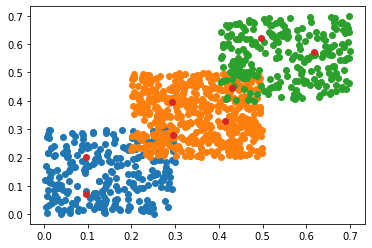

In [48]:
# Using Test Data
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
import random

X = np.random.uniform(0, 0.3, size=(250, 2))

Y = np.random.uniform(0.2, 0.5, size=(500, 2))

Z = np.random.uniform(0.4, 0.7, size=(250, 2))

clustering = MeanShift(bandwidth=0.1).fit(np.concatenate((X, Y, Z)))

print(clustering.predict([[0, 0], [5, 5]]))

print(clustering.get_params())
print(len(clustering.cluster_centers_))

plt.plot(X[:, 0], X[:, 1], 'o')
plt.plot(Y[:, 0], Y[:, 1], 'o')
plt.plot(Z[:, 0], Z[:, 1], 'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()

{'bandwidth': 0.05, 'bin_seeding': False, 'cluster_all': True, 'max_iter': 300, 'min_bin_freq': 1, 'n_jobs': -1, 'seeds': None}
7


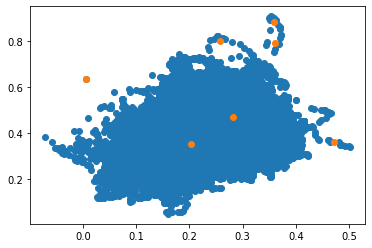

In [90]:
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)
clustering = MeanShift(bandwidth=0.05, n_jobs=-1).fit(both_hands)

print(clustering.get_params())
print(len(clustering.cluster_centers_))
plt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()

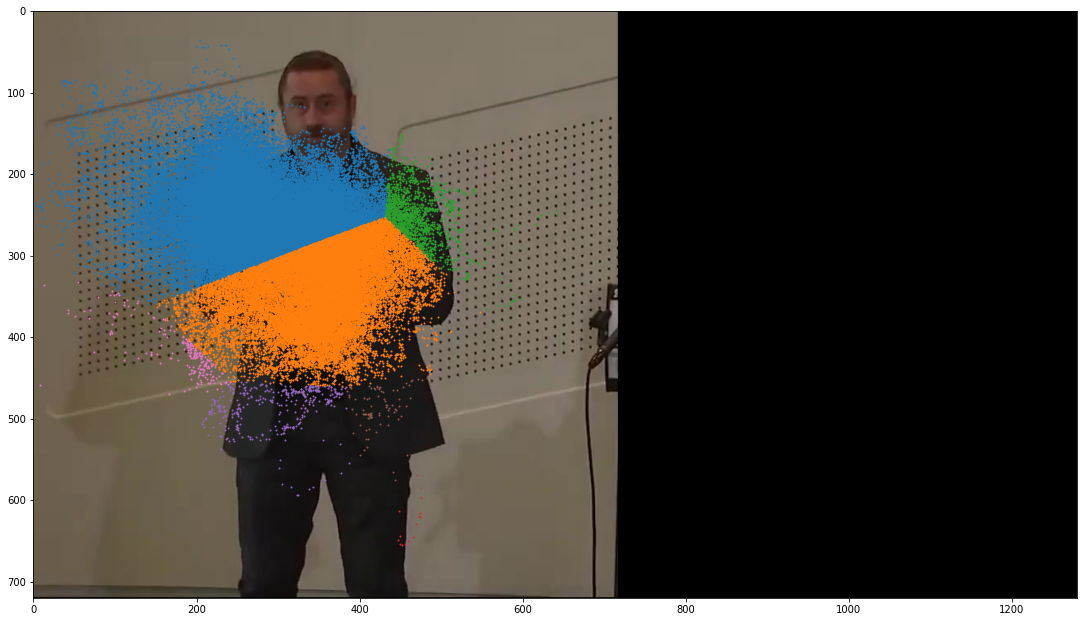

In [97]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = clustering.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
both_hands = np.array(left_hand + right_hand)
for center in range(0, len(clustering.cluster_centers_)):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1)
plt.imshow(background_image)
fig.savefig("./Clustered_MeanShifting.png", dpi=100)
plt.show()

### K-Means Clustering

[[0.27008669 0.31441704]
 [0.25345657 0.55498137]
 [0.18572075 0.34851298]
 [0.29470917 0.38680957]
 [0.19113811 0.43133294]
 [0.29669892 0.47306971]
 [0.17163294 0.25277388]]


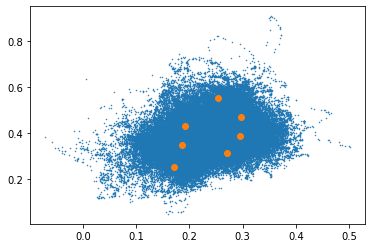

In [28]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)

kmeans = KMeans(n_clusters=7, random_state=0).fit(both_hands)

print(kmeans.cluster_centers_)
plt.plot(both_hands[:, 0], both_hands[:, 1] ,'o', markersize=0.5)
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'o')
plt.show()

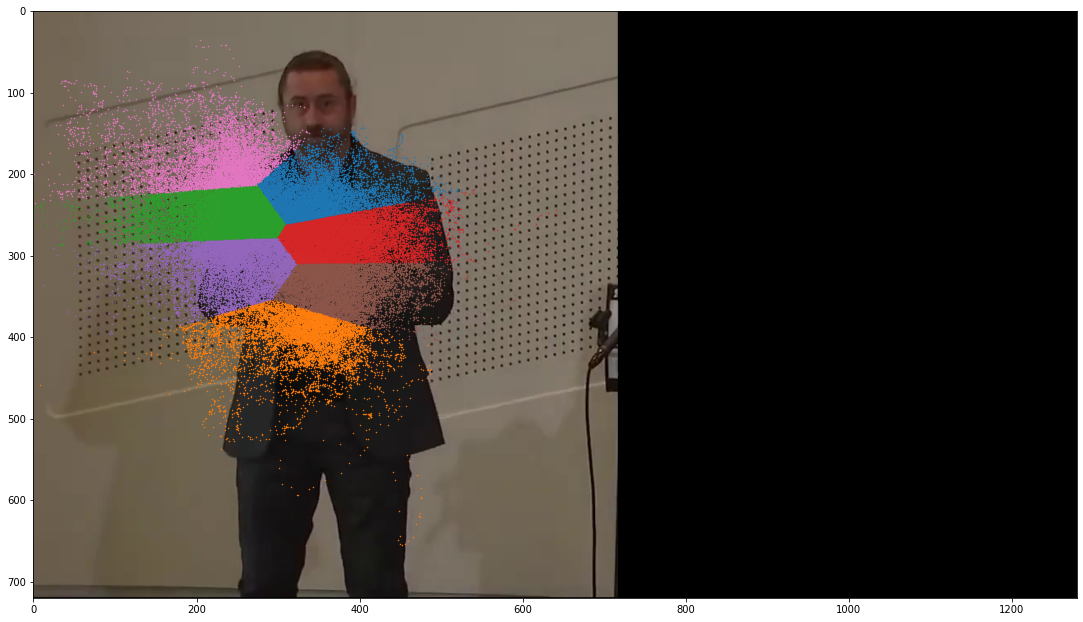

In [29]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = kmeans.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=0.5)
plt.imshow(background_image)
fig.savefig("./Clustered_K_means.png", dpi=100)
plt.show()

### DBSCAN Clustering (MEMORY OVERFLOW!)

In [1]:
"""
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)
print(len(both_hands), len())

clustering = DBSCAN(eps=0.5, min_samples=5).fit(both_hands)

print(clustering.get_params())
print(len(clustering.cluster_centers_))
plt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,'o')
plt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], 'o')
plt.show()"""

'\nfrom sklearn.cluster import DBSCAN\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport random\nimport pandas as pd\nimport cv2\n\ndef convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):\n    data = []\n    for x, y, in zip(datax, datay):\n        data.append(tuple((x*width, y*height)))\n    return data\n\n# Read in data\nDATA_LOC = "./caRsLq4962c_Filtered.csv"\n\ndata = pd.read_csv(DATA_LOC)\n\nleft_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])\nright_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])\nboth_hands = np.array(left_hand + right_hand)\nprint(len(both_hands), len())\n\nclustering = DBSCAN(eps=0.5, min_samples=5).fit(both_hands)\n\nprint(clustering.get_params())\nprint(len(clustering.cluster_centers_))\nplt.plot(np.array(both_hands)[:, 0], np.array(both_hands)[:, 1] ,\'o\')\nplt.plot(clustering.cluster_centers_[:, 0], clustering.cluster_centers_[:, 1], \'o\')\nplt.show()'

In [52]:
from sklearn.cluster import Birch
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import cv2

def convert_csv_to_list_of_tuple(datax, datay, height=1, width=1):
    data = []
    for x, y, in zip(datax, datay):
        data.append(tuple((x*width, y*height)))
    return data

# Read in data
DATA_LOC = "./caRsLq4962c_Filtered.csv"

data = pd.read_csv(DATA_LOC)

left_hand = convert_csv_to_list_of_tuple(data["Left Hand.x"], data["Left Hand.y"])
right_hand = convert_csv_to_list_of_tuple(data["Right Hand.x"], data["Right Hand.y"])
both_hands = np.array(left_hand + right_hand)

brc = Birch(n_clusters=7, threshold=0.02)
brc.fit(both_hands)



Birch(n_clusters=7, threshold=0.02)

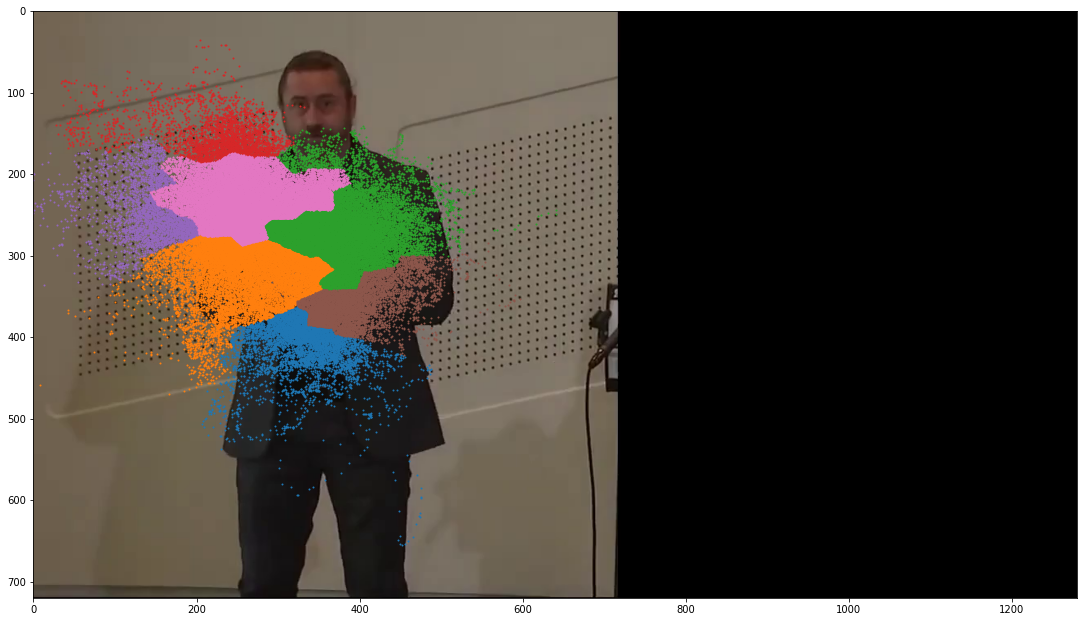

In [53]:
background_image = cv2.cvtColor(cv2.imread("./img3.png"), cv2.COLOR_BGR2RGB)
height, width, _ = background_image.shape
predicts = brc.predict(both_hands)
fig = plt.figure(1)
fig.set_size_inches((19.2, 10.8))
for center in np.unique(predicts):
    indices = np.where(predicts == center)
    plt.plot(both_hands[indices[0], 0]*width, both_hands[indices[0], 1]*height, 'o', markersize=1, alpha=1)
plt.imshow(background_image)
fig.savefig("./Clustered_BIRCH.png", dpi=100)
plt.show()

